# Video Classifier Using CNN and RNN
#!dir



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: 

# Imports Libraries and Loading Dataset

For training our data for classification, the data (Videos) are divided into two folders ( Clear and KnockDown) and split them 80 % for training and 20% for testing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('/content/drive/MyDrive/AI R&D Project/Equestrian/dataset_temp3/train')

label_types = os.listdir('/content/drive/MyDrive/AI R&D Project/Equestrian/dataset_temp3/train')
print (label_types)

['Clear', 'KnockDown']


# Preparing Training Data

In [ ]:
# import random
# rooms = []
# clear_counter=0

# for item in dataset_path:
#  # Get all the file names

#  all_rooms = os.listdir('/content/drive/MyDrive/AI R&D Project/Equestrian/dataset_temp3/train' + '/' +item)

#   # Add them to the list
#  for room in all_rooms:
#     if item=='Clear':
#       clear_counter+=1
#       if clear_counter==219 :
#         break
#       else:
#         rooms.append((item, str('/content/drive/MyDrive/AI R&D Project/Equestrian/dataset_temp3/train' + '/' +item) + '/' + room))
#     else:
#       rooms.append((item, str('/content/drive/MyDrive/AI R&D Project/Equestrian/dataset_temp3/train' + '/' +item) + '/' + room))

# # Build a dataframe
# train_df = pd.DataFrame(data=rooms, columns=['tag', 'video_name'])
# print(train_df.head())
# print(train_df.tail())

         tag                                         video_name
0  KnockDown  /content/drive/MyDrive/AI R&D Project/Equestri...
1  KnockDown  /content/drive/MyDrive/AI R&D Project/Equestri...
2  KnockDown  /content/drive/MyDrive/AI R&D Project/Equestri...
3  KnockDown  /content/drive/MyDrive/AI R&D Project/Equestri...
4  KnockDown  /content/drive/MyDrive/AI R&D Project/Equestri...
       tag                                         video_name
431  Clear  /content/drive/MyDrive/AI R&D Project/Equestri...
432  Clear  /content/drive/MyDrive/AI R&D Project/Equestri...
433  Clear  /content/drive/MyDrive/AI R&D Project/Equestri...
434  Clear  /content/drive/MyDrive/AI R&D Project/Equestri...
435  Clear  /content/drive/MyDrive/AI R&D Project/Equestri...


In [ ]:
# tag_counts = train_df['tag'].value_counts()
# print(tag_counts)

Clear        218
KnockDown    218
Name: tag, dtype: int64


Create a list of training Data which is including of each video_name and its label as tag, then build a dataframe as csv file named train.csv

In [ ]:
rooms = []

for item in dataset_path:
 # Get all the file names
 all_rooms = os.listdir('/content/drive/MyDrive/AI R&D Project/Equestrian/dataset_temp3/train' + '/' +item)

 # Add them to the list
 for room in all_rooms:
    rooms.append((item, str('/content/drive/MyDrive/AI R&D Project/Equestrian/dataset_temp3/train' + '/' +item) + '/' + room))

# Build a dataframe
train_df = pd.DataFrame(data=rooms, columns=['tag', 'video_name'])
print(train_df.head())
print(train_df.tail())


     tag                                         video_name
0  Clear  /content/drive/MyDrive/AI R&D Project/Equestri...
1  Clear  /content/drive/MyDrive/AI R&D Project/Equestri...
2  Clear  /content/drive/MyDrive/AI R&D Project/Equestri...
3  Clear  /content/drive/MyDrive/AI R&D Project/Equestri...
4  Clear  /content/drive/MyDrive/AI R&D Project/Equestri...
            tag                                         video_name
3611  KnockDown  /content/drive/MyDrive/AI R&D Project/Equestri...
3612  KnockDown  /content/drive/MyDrive/AI R&D Project/Equestri...
3613  KnockDown  /content/drive/MyDrive/AI R&D Project/Equestri...
3614  KnockDown  /content/drive/MyDrive/AI R&D Project/Equestri...
3615  KnockDown  /content/drive/MyDrive/AI R&D Project/Equestri...


In [ ]:
df = train_df.loc[:,['video_name','tag']]
df
df.to_csv('/content/drive/MyDrive/AI R&D Project/Equestrian/train.csv')

# Preparing Test Data
Create a list of testing Data which is including of each video_name and its label as tag, then build a dataframe as csv file named test.csv

In [ ]:
dataset_path = os.listdir('/content/drive/MyDrive/AI R&D Project/Equestrian/dataset_temp3/test')
print(dataset_path)

room_types = os.listdir('/content/drive/MyDrive/AI R&D Project/Equestrian/dataset_temp3/test')
print("Types of activities found: ", len(dataset_path))

rooms = []

for item in dataset_path:
 # Get all the file names
 all_rooms = os.listdir('/content/drive/MyDrive/AI R&D Project/Equestrian/dataset_temp3/test' + '/' +item)

 # Add them to the list
 for room in all_rooms:
    rooms.append((item, str('/content/drive/MyDrive/AI R&D Project/Equestrian/dataset_temp3/test' + '/' +item) + '/' + room))

# Build a dataframe
test_df = pd.DataFrame(data=rooms, columns=['tag', 'video_name'])
print(test_df.head())
print(test_df.tail())

df = test_df.loc[:,['video_name','tag']]
df
df.to_csv('/content/drive/MyDrive/AI R&D Project/Equestrian/test.csv')

['KnockDown', 'Clear']
Types of activities found:  2
         tag                                         video_name
0  KnockDown  /content/drive/MyDrive/AI R&D Project/Equestri...
1  KnockDown  /content/drive/MyDrive/AI R&D Project/Equestri...
2  KnockDown  /content/drive/MyDrive/AI R&D Project/Equestri...
3  KnockDown  /content/drive/MyDrive/AI R&D Project/Equestri...
4  KnockDown  /content/drive/MyDrive/AI R&D Project/Equestri...
       tag                                         video_name
899  Clear  /content/drive/MyDrive/AI R&D Project/Equestri...
900  Clear  /content/drive/MyDrive/AI R&D Project/Equestri...
901  Clear  /content/drive/MyDrive/AI R&D Project/Equestri...
902  Clear  /content/drive/MyDrive/AI R&D Project/Equestri...
903  Clear  /content/drive/MyDrive/AI R&D Project/Equestri...


Loading Tensorflow libraries from its git

In [ ]:
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-onqv722x
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmp/pip-req-build-onqv722x
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 377, in run
    requirement_set = resolver.resolve(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 73, in resolve
    collected = self.factory.collect_root_requirements(root_reqs)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/resolution/resolvelib/factory.py", line 491, in collect_root_requirements
    req = self._make_re

In [ ]:
from tensorflow_docs.vis import embed
from tensorflow import keras
from imutils import paths

import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import imageio
import cv2
import os

Tensorflow Configuration to use 5GB  of GPU memory. It's a useful for managing GPU resources effectively.

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],[tf.config.experimental.VirtualDeviceConfiguration(memory_limit=5120)])
  except RuntimeError as e:
    print(e)

Read CSV files containing training and testing data into pandas DataFrames and provides basic information about the size of the datasets. Show a sample of dataframe

In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/AI R&D Project/Equestrian/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/AI R&D Project/Equestrian/test.csv")

print(f"Total videos for training: {len(train_df)}")
print(f"Total videos for testing: {len(test_df)}")


train_df.sample(10)

Total videos for training: 3616
Total videos for testing: 904


,Unnamed: 0,video_name,tag
1683,1683,/content/drive/MyDrive/AI R&D Project/Equestri...,Clear
453,453,/content/drive/MyDrive/AI R&D Project/Equestri...,Clear
656,656,/content/drive/MyDrive/AI R&D Project/Equestri...,Clear
3005,3005,/content/drive/MyDrive/AI R&D Project/Equestri...,Clear
1959,1959,/content/drive/MyDrive/AI R&D Project/Equestri...,Clear
3599,3599,/content/drive/MyDrive/AI R&D Project/Equestri...,KnockDown
2788,2788,/content/drive/MyDrive/AI R&D Project/Equestri...,Clear
1484,1484,/content/drive/MyDrive/AI R&D Project/Equestri...,Clear
149,149,/content/drive/MyDrive/AI R&D Project/Equestri...,Clear
1947,1947,/content/drive/MyDrive/AI R&D Project/Equestri...,Clear


# Feed the videos through a network:


 preprocess video data, including center cropping, resizing, and channel reordering, making them suitable for consumption by the models, particularly those dealing with video analysis or action recognition.

In [ ]:
# The following two methods are taken from this tutorial:
# https://www.tensorflow.org/hub/tutorials/action_recognition_with_tf_hub
IMG_SIZE = 224


def crop_center_square(frame):
    y, x = frame.shape[0:2]
    min_dim = min(y, x)
    start_x = (x // 2) - (min_dim // 2)
    start_y = (y // 2) - (min_dim // 2)
    return frame[start_y : start_y + min_dim, start_x : start_x + min_dim]


def load_video(path, max_frames=0, resize=(IMG_SIZE, IMG_SIZE)):
    cap = cv2.VideoCapture(path)
    frames = []
    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                break
            frame = crop_center_square(frame)
            frame = cv2.resize(frame, resize)
            frame = frame[:, :, [2, 1, 0]]
            frames.append(frame)

            if len(frames) == max_frames:
                break
    finally:
        cap.release()
    return np.array(frames)

   ### Feature Extraction (CNN)
   Feature extractor model based on the InceptionV3 architecture using Keras

In [ ]:
def build_feature_extractor():
    feature_extractor = keras.applications.InceptionV3(
        weights="imagenet",
        include_top=False,
        pooling="avg",
        input_shape=(IMG_SIZE, IMG_SIZE, 3),
    )
    preprocess_input = keras.applications.inception_v3.preprocess_input

    inputs = keras.Input((IMG_SIZE, IMG_SIZE, 3))
    preprocessed = preprocess_input(inputs)

    outputs = feature_extractor(preprocessed)
    return keras.Model(inputs, outputs, name="feature_extractor")


feature_extractor = build_feature_extractor()

### Label Encoding
StringLookup layer encode the class labels as integers. Convert 'Clear' Label to '0' and 'KnockDown' to '1'

In [ ]:
label_processor = keras.layers.StringLookup(num_oov_indices=0, vocabulary=np.unique(train_df["tag"]))
print(label_processor.get_vocabulary())

labels = train_df["tag"].values
labels = label_processor(labels[..., None]).numpy()
labels

['Clear', 'KnockDown']


array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

Finally, we can put all the pieces together to create our data processing utility.

In [ ]:
#print(train_data[0].shape)
#train_data[0]

**Hyperparameters**

In [ ]:
#Define hyperparameters

IMG_SIZE = 224
BATCH_SIZE = 64
EPOCHS = 30

MAX_SEQ_LENGTH = 30
NUM_FEATURES = 2048

In [ ]:
def prepare_all_videos(df, root_dir):
    num_samples = len(df)
    video_paths = df["video_name"].values.tolist()

    ##take all classlabels from train_df column named 'tag' and store in labels
    labels = df["tag"].values

    #convert classlabels to label encoding
    labels = label_processor(labels[..., None]).numpy()

    # `frame_masks` and `frame_features` are what we will feed to our sequence model.
    # `frame_masks` will contain a bunch of booleans denoting if a timestep is
    # masked with padding or not.
    frame_masks = np.zeros(shape=(num_samples, MAX_SEQ_LENGTH), dtype="bool") # 145,20
    frame_features = np.zeros(shape=(num_samples, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32") #145,20,2048

    # For each video.
    for idx, path in enumerate(video_paths):
        # Gather all its frames and add a batch dimension.
        frames = load_video(os.path.join(root_dir, path))
        frames = frames[None, ...]

        # Initialize placeholders to store the masks and features of the current video.
        temp_frame_mask = np.zeros(shape=(1, MAX_SEQ_LENGTH,), dtype="bool")
        temp_frame_features = np.zeros(
            shape=(1, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32"
        )

        # Extract features from the frames of the current video.
        for i, batch in enumerate(frames):
            video_length = batch.shape[0]
            length = min(MAX_SEQ_LENGTH, video_length)
            for j in range(length):
                temp_frame_features[i, j, :] = feature_extractor.predict(
                    batch[None, j, :]
                )
            temp_frame_mask[i, :length] = 1  # 1 = not masked, 0 = masked

        frame_features[idx,] = temp_frame_features.squeeze()
        frame_masks[idx,] = temp_frame_mask.squeeze()

    return (frame_features, frame_masks), labels


train_data, train_labels = prepare_all_videos(train_df, "train")
test_data, test_labels = prepare_all_videos(test_df, "test")

print(f"Frame features in train set: {train_data[0].shape}")
print(f"Frame masks in train set: {train_data[1].shape}")



print(f"train_labels in train set: {train_labels.shape}")

print(f"test_labels in train set: {test_labels.shape}")

# MAX_SEQ_LENGTH = 20, NUM_FEATURES = 2048. We have defined this above under hyper parameters

##### Save Data
import numpy as np
import pickle

def save_data(data, labels, filename_prefix):
    np.save(f"/content/drive/MyDrive/AI R&D Project/Equestrian/{filename_prefix}_data.npy", data)
    np.save(f"/content/drive/MyDrive/AI R&D Project/Equestrian/{filename_prefix}_labels.npy", labels)

# Save train and test data
save_data(train_data[0], train_labels, "train")
save_data(test_data[0], test_labels, "test")

# Save train and test masks
np.save("/content/drive/MyDrive/AI R&D Project/Equestrian/train_masks.npy", train_data[1])
np.save("/content/drive/MyDrive/AI R&D Project/Equestrian/test_masks.npy", test_data[1])

print("Data saved successfully.")


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-14-3a2e1c7bc922>", line 45, in <cell line: 45>
    train_data, train_labels = prepare_all_videos(train_df, "train")
  File "<ipython-input-14-3a2e1c7bc922>", line 34, in prepare_all_videos
    temp_frame_features[i, j, :] = feature_extractor.predict(
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2655, in predict
    tmp_batch_outputs = self.predict_function(iterator)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/polymorphi

TypeError: object of type 'NoneType' has no len()

Save Data

In [ ]:
import numpy as np
import pickle

def save_data(data, labels, filename_prefix):
    np.save(f"/content/drive/MyDrive/AI R&D Project/Equestrian/{filename_prefix}_data.npy", data)
    np.save(f"/content/drive/MyDrive/AI R&D Project/Equestrian/{filename_prefix}_labels.npy", labels)

# Save train and test data
save_data(train_data[0], train_labels, "train")
save_data(test_data[0], test_labels, "test")

# Save train and test masks
np.save("/content/drive/MyDrive/AI R&D Project/Equestrian/train_masks.npy", train_data[1])
np.save("/content/drive/MyDrive/AI R&D Project/Equestrian/test_masks.npy", test_data[1])

print("Data saved successfully.")


Data saved successfully.


Load Data

In [ ]:
def load_data(filename_prefix):
    data = np.load(f"/content/drive/MyDrive/AI R&D Project/Equestrian/{filename_prefix}_data.npy")
    labels = np.load(f"/content/drive/MyDrive/AI R&D Project/Equestrian/{filename_prefix}_labels.npy")
    return data, labels

# Load train and test data
train_data, train_labels = load_data("train")
test_data, test_labels = load_data("test")

# Load train and test masks
train_masks = np.load("/content/drive/MyDrive/AI R&D Project/Equestrian/train_masks.npy")
test_masks = np.load("/content/drive/MyDrive/AI R&D Project/Equestrian/test_masks.npy")

print(f"Loaded train data shape: {train_data.shape}")
print(f"Loaded train labels shape: {train_labels.shape}")
print(f"Loaded test data shape: {test_data.shape}")
print(f"Loaded test labels shape: {test_labels.shape}")
print(f"Loaded train masks shape: {train_masks.shape}")
print(f"Loaded test masks shape: {test_masks.shape}")


Loaded train data shape: (3616, 30, 2048)
Loaded train labels shape: (3616, 1)
Loaded test data shape: (904, 30, 2048)
Loaded test labels shape: (904, 1)
Loaded train masks shape: (3616, 30)
Loaded test masks shape: (904, 30)


# The sequence model (RNN)
Now, we can feed these extracted features to a sequence model consisting of recurrent layers like GRU.

In [ ]:
train_labels.shape

(3616, 1)

In [ ]:
# Import the learning rate scheduler
from keras.callbacks import ReduceLROnPlateau

# Define the learning rate scheduler callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.01)

Training Model and get the accuracy

In [ ]:
# Utility for our sequence model.
def get_sequence_model():
    class_vocab = label_processor.get_vocabulary()

    frame_features_input = keras.Input((MAX_SEQ_LENGTH, NUM_FEATURES))
    mask_input = keras.Input((MAX_SEQ_LENGTH,), dtype="bool")

    # Refer to the following tutorial to understand the significance of using `mask`:
    # https://keras.io/api/layers/recurrent_layers/gru/
    # x = keras.layers.GRU(16, return_sequences=True)(frame_features_input, mask=mask_input)
    # x = keras.layers.GRU(8)(x)
    # x = keras.layers.Dropout(0.4)(x)
    # x = keras.layers.Dense(8, activation="relu")(x)
    ###
    # Add more GRU layers

    x = keras.layers.GRU(16, return_sequences=True)(frame_features_input, mask=mask_input)
    x = keras.layers.GRU(16, return_sequences=True)(x)
    x = keras.layers.BatchNormalization()(x)  # Add BatchNormalization layer
    x = keras.layers.GRU(8)(x)
    x = keras.layers.BatchNormalization()(x)  # Add BatchNormalization layer
    # Add L2 regularization to the Dense layers
    x = keras.layers.Dense(8, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01))(x)
    # Experiment with different dropout rates
    x = keras.layers.Dropout(0.5)(x)

    ####

    output = keras.layers.Dense(len(class_vocab), activation="softmax")(x)

    rnn_model = keras.Model([frame_features_input, mask_input], output)

    rnn_model.compile(
        loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
    )
    return rnn_model

EPOCHS = 10
# Utility for running experiments.
def run_experiment():
    filepath = "./tmp/video_classifier"
    checkpoint = keras.callbacks.ModelCheckpoint(
        filepath, save_weights_only=True, save_best_only=True, verbose=1
    )

    seq_model = get_sequence_model()
    history = seq_model.fit(
        [train_data, train_masks],
        train_labels,
        validation_split=0.3,
        epochs=EPOCHS,
        # callbacks=[checkpoint],
        callbacks=[checkpoint, reduce_lr],
    )
    #--------------------------------------------
    # history = seq_model.fit(
    #     [train_data[0], train_data[1]],
    #     train_labels,
    #     validation_split=0.3,
    #     epochs=EPOCHS,
    #     callbacks=[checkpoint],
    # )

    # seq_model.load_weights(filepath)
    # _, accuracy = seq_model.evaluate([test_data[0], test_data[1]], test_labels)
    #-------------------------------------------------

    seq_model.load_weights(filepath)
    _, accuracy = seq_model.evaluate([test_data, test_masks], test_labels)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")

    return history, seq_model


history, sequence_model = run_experiment()

Epoch 1/10
80/80 [==============================] - ETA: 0s - loss: 0.6540 - accuracy: 0.7337
Epoch 1: val_loss improved from inf to 0.56449, saving model to ./tmp/video_classifier
80/80 [==============================] - 26s 75ms/step - loss: 0.6540 - accuracy: 0.7337 - val_loss: 0.5645 - val_accuracy: 0.8387 - lr: 0.0010
Epoch 2/10
80/80 [==============================] - ETA: 0s - loss: 0.4176 - accuracy: 0.9660
Epoch 2: val_loss improved from 0.56449 to 0.51651, saving model to ./tmp/video_classifier
80/80 [==============================] - 2s 25ms/step - loss: 0.4176 - accuracy: 0.9660 - val_loss: 0.5165 - val_accuracy: 0.8387 - lr: 0.0010
Epoch 3/10
80/80 [==============================] - ETA: 0s - loss: 0.3363 - accuracy: 0.9949
Epoch 3: val_loss did not improve from 0.51651
80/80 [==============================] - 2s 31ms/step - loss: 0.3363 - accuracy: 0.9949 - val_loss: 0.5293 - val_accuracy: 0.8387 - lr: 0.0010
Epoch 4/10
79/80 [============================>.] - ETA: 0s - l

In [ ]:
import keras
from keras.layers import Input, GRU, Dropout, Dense, Masking
from keras.models import Model
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam

def get_sequence_model():
    class_vocab = label_processor.get_vocabulary()
    MAX_SEQ_LENGTH = 30  # Define your MAX_SEQ_LENGTH
    NUM_FEATURES = 2048   # Define your NUM_FEATURES

    frame_features_input = Input((MAX_SEQ_LENGTH, NUM_FEATURES))
    mask_input = Input((MAX_SEQ_LENGTH,), dtype="bool")

    x = Masking(mask_value=0.0)(frame_features_input)  # Masking layer to handle variable sequence lengths
    x = GRU(64, return_sequences=True)(x)
    x = Dropout(0.5)(x)
    x = GRU(32)(x)
    x = Dropout(0.5)(x)
    x = Dense(32, activation="relu")(x)
    output = Dense(len(class_vocab), activation="softmax")(x)

    rnn_model = Model([frame_features_input, mask_input], output)

    optimizer = Adam(learning_rate=0.0001)
    rnn_model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return rnn_model

EPOCHS = 10

def run_experiment():
    filepath = "./tmp/video_classifier"
    checkpoint = ModelCheckpoint(filepath, save_weights_only=True, save_best_only=True, verbose=1)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

    seq_model = get_sequence_model()
    history = seq_model.fit(
        [train_data, train_masks],
        train_labels,
        validation_split=0.3,
        epochs=EPOCHS,
        callbacks=[checkpoint, reduce_lr],
        batch_size=64  # Increase batch size for faster convergence
    )

    seq_model.load_weights(filepath)
    _, accuracy = seq_model.evaluate([test_data, test_masks], test_labels)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")

    return history, seq_model

history, sequence_model = run_experiment()


Epoch 1/10
39/40 [============================>.] - ETA: 0s - loss: 0.3179 - accuracy: 0.9034
Epoch 1: val_loss improved from inf to 0.51275, saving model to ./tmp/video_classifier
40/40 [==============================] - 13s 135ms/step - loss: 0.3157 - accuracy: 0.9048 - val_loss: 0.5128 - val_accuracy: 0.8387 - lr: 1.0000e-04
Epoch 2/10
39/40 [============================>.] - ETA: 0s - loss: 0.1301 - accuracy: 0.9944
Epoch 2: val_loss did not improve from 0.51275
40/40 [==============================] - 1s 33ms/step - loss: 0.1299 - accuracy: 0.9945 - val_loss: 0.6177 - val_accuracy: 0.8387 - lr: 1.0000e-04
Epoch 3/10
39/40 [============================>.] - ETA: 0s - loss: 0.0765 - accuracy: 0.9996
Epoch 3: val_loss did not improve from 0.51275
40/40 [==============================] - 1s 30ms/step - loss: 0.0762 - accuracy: 0.9996 - val_loss: 0.6933 - val_accuracy: 0.8387 - lr: 1.0000e-04
Epoch 4/10
39/40 [============================>.] - ETA: 0s - loss: 0.0544 - accuracy: 0.9996


Plot Loss and Accuracy Graphs

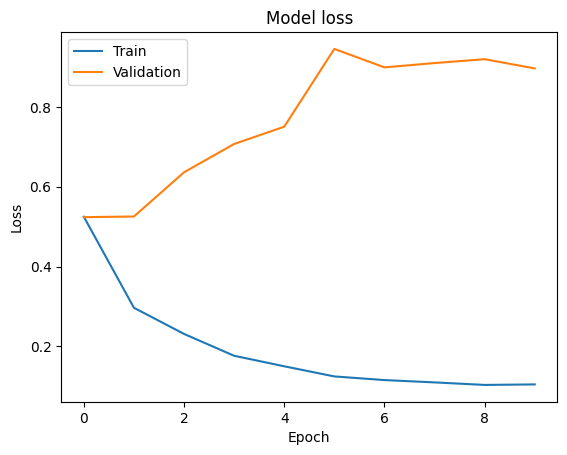

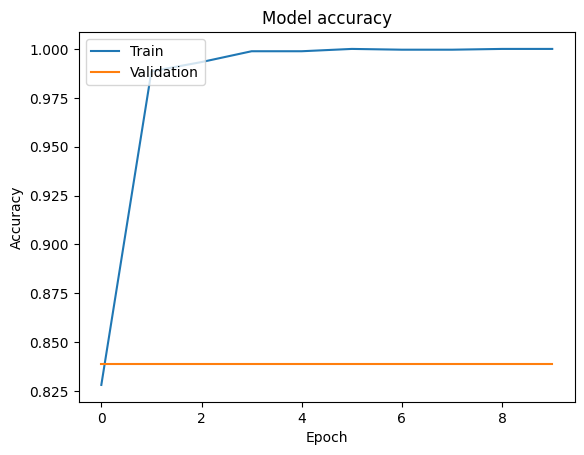

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Inference

Prediction: Predict whether a video is a 'Clear' jump or unclear jump (Knockdown)

In [ ]:
def prepare_single_video(frames):
    frames = frames[None, ...]
    frame_mask = np.zeros(shape=(1, MAX_SEQ_LENGTH,), dtype="bool")
    frame_features = np.zeros(shape=(1, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32")

    for i, batch in enumerate(frames):
        video_length = batch.shape[0]
        length = min(MAX_SEQ_LENGTH, video_length)
        for j in range(length):
            frame_features[i, j, :] = feature_extractor.predict(batch[None, j, :])
        frame_mask[i, :length] = 1  # 1 = not masked, 0 = masked

    return frame_features, frame_mask


def sequence_prediction(path):
    class_vocab = label_processor.get_vocabulary()

    frames = load_video(os.path.join("test", path))
    frame_features, frame_mask = prepare_single_video(frames)
    probabilities = sequence_model.predict([frame_features, frame_mask])[0]

    for i in np.argsort(probabilities)[::-1]:
        print(f"  {class_vocab[i]}: {probabilities[i] * 100:5.2f}%")
    return frames

test_video = np.random.choice(test_df["video_name"].values.tolist())
print(f"Test video path: {test_video}")

test_frames = sequence_prediction(test_video)


Test video path: /content/drive/MyDrive/AI R&D Project/Equestrian/dataset_temp3/test/Clear/Tim Gredley - Medoc de Toxandria - Hickstead - 1.60m - 28.07.2023 Round 1.mp4_32133-33883_Clear_7.mp4
1/1 [==============================] - 3s 3s/step
  Clear: 85.00%
  KnockDown: 15.00%


In [ ]:
t=test_df[test_df['tag'] == 'KnockDown']
test_video = np.random.choice(t["video_name"].values.tolist())
print(f"Test video path: {test_video}")

test_frames = sequence_prediction(test_video)

Test video path: /content/drive/MyDrive/AI R&D Project/Equestrian/dataset_temp3/test/KnockDown/Tim Gredley - Sparks 55 - St Tropez - 1.45m - 10.09.2022.mp4_44233-45983_Knock Down_12.mp4
1/1 [==============================] - 0s 84ms/step
  Clear: 86.36%
  KnockDown: 13.64%


In [ ]:
test_video = np.random.choice(test_df["video_name"].values.tolist())
print(f"Test video path: {test_video}")

test_frames = sequence_prediction(test_video)

Test video path: /content/drive/MyDrive/AI R&D Project/Equestrian/dataset_temp3/test/Clear/Tim Gredley - Imperial Hbf - Abu Dhabi - 1.50m - 15.01.2023.mp4_73874-75624_Clear_20.mp4
1/1 [==============================] - 0s 148ms/step


KeyboardInterrupt: 

In [ ]:
test_video = "/content/drive/MyDrive/AI R&D Project/Equestrian/dataset_temp3/test/KnockDown/Tim Gredley - Belinda  - Lanaken - 1.45m - 01.04.2022.mp4_False_13.mp4"
print(f"Test video path: {test_video}")
# "D:\UNI\British_equistrian\Ammar\Chunks\Custom\train\failure\Ben Maher - Explosion W - Aachen - 1.60m - 03.07.2022 Round 2_False_10.mp4"
# "D:\UNI\British_equistrian\Ammar\Chunks\Custom\train\failure\Scott Brash - Hello Jefferson - Aachen - 1.60m - 03.07.2022 Round 2_False_0.mp4"
# "D:\UNI\British_equistrian\Ammar\Chunks\Custom\train\failure\Ben Maher - Explosion W - Aachen - 1.60m - 03.07.2022 Round 2.mp4_False_10.mp4"
test_frames = sequence_prediction(test_video)

Test video path: /content/drive/MyDrive/AI R&D Project/Equestrian/dataset_temp3/test/KnockDown/Tim Gredley - Belinda  - Lanaken - 1.45m - 01.04.2022.mp4_False_13.mp4
1/1 [==============================] - 0s 45ms/step
  Clear: 89.52%
  KnockDown: 10.48%


In [ ]:
from IPython.display import HTML

# Replace 'video.mp4' with the name of your .mp4 file
video_path = 'video.mp4'

# Generate HTML code to embed the video
html_code = f'''
<video width="640" height="480" controls>
  <source src="{test_video}" type="video/mp4">
</video>
'''

# Display the HTML code
HTML(html_code)


In [ ]:
from IPython.display import HTML

HTML("""
    <video alt="train" width="520" height="440" controls>
        <source src="/content/drive/MyDrive/AI R&D Project/Equestrian/dataset/train/failure/Scott Brash - Hello Jefferson - Aachen - 1.60m - 03.07.2022 Round 2_False_0.mp4" type="video/mp4" style="height:300px;width:300px">
    </video>
""")
